# image preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import sys

In [2]:
print(os.getcwd())

E:\Learning\SW Programming\AI\Deep_Learning\image processing


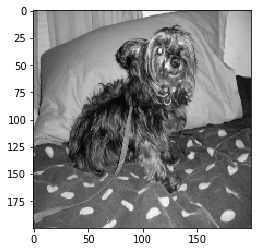

In [3]:
CATEGORIES = ["Dog", "Cat"]

training_data = []
IMG_SIZE = 50

for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(os.getcwd(),category)  # create path to dogs and cats
        
        for img in os.listdir(path):  # iterate over each image per dogs and cats
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)  # convert to array
                img_array = cv2.resize(img_array, (200, 200))
                #plt.imshow(img_array,cmap=plt.cm.binary)
                plt.imshow(img_array,cmap='gray')
                plt.show()
                break
        break
                

In [4]:
print(img_array.shape)


(200, 200)


In [8]:
#Loading in your own data in differnt floders

DATADIR = os.getcwd()

CATEGORIES = ["Dog", "Cat"]

training_data = []
IMG_SIZE = 200

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat
        print("folder path --->>",path,class_num)

        for img in os.listdir(path):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)  # convert to array
                #img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2GRAY)
                print('image path ->',os.path.join(path,img))

                print('img_array',img_array.shape)
                newimg_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                print('newimg_array',newimg_array.shape)
                training_data.append([newimg_array, class_num])  # add this to our training_data
                
                #cv2.imshow('img',newimg_array)
                #cv2.waitKey(50)
                #cv2.destroyAllWindows()
            except Exception as e:  # in the interest in keeping the output clean...
                print("general exception", e, os.path.join(path,img))
            except OSError as e:
                print("OSErrroBad img most likely", e, os.path.join(path,img))
                

In [9]:
create_training_data()


folder path --->> E:\Learning\SW Programming\AI\Deep_Learning\image processing\Dog 0
image path -> E:\Learning\SW Programming\AI\Deep_Learning\image processing\Dog\0.jpg
img_array (375, 500)
newimg_array (200, 200)
image path -> E:\Learning\SW Programming\AI\Deep_Learning\image processing\Dog\1.jpg
img_array (500, 327)
newimg_array (200, 200)
image path -> E:\Learning\SW Programming\AI\Deep_Learning\image processing\Dog\10.jpg
img_array (293, 269)
newimg_array (200, 200)
image path -> E:\Learning\SW Programming\AI\Deep_Learning\image processing\Dog\11.jpg
img_array (102, 135)
newimg_array (200, 200)
image path -> E:\Learning\SW Programming\AI\Deep_Learning\image processing\Dog\12.jpg
img_array (162, 98)
newimg_array (200, 200)
image path -> E:\Learning\SW Programming\AI\Deep_Learning\image processing\Dog\13.jpg
img_array (428, 363)
newimg_array (200, 200)
image path -> E:\Learning\SW Programming\AI\Deep_Learning\image processing\Dog\14.jpg
img_array (387, 500)
newimg_array (200, 200)
i

image path -> E:\Learning\SW Programming\AI\Deep_Learning\image processing\Dog\87.jpg
img_array (375, 500)
newimg_array (200, 200)
image path -> E:\Learning\SW Programming\AI\Deep_Learning\image processing\Dog\88.jpg
img_array (329, 500)
newimg_array (200, 200)
image path -> E:\Learning\SW Programming\AI\Deep_Learning\image processing\Dog\89.jpg
img_array (375, 500)
newimg_array (200, 200)
image path -> E:\Learning\SW Programming\AI\Deep_Learning\image processing\Dog\9.jpg
img_array (500, 369)
newimg_array (200, 200)
image path -> E:\Learning\SW Programming\AI\Deep_Learning\image processing\Dog\90.jpg
img_array (500, 285)
newimg_array (200, 200)
image path -> E:\Learning\SW Programming\AI\Deep_Learning\image processing\Dog\91.jpg
img_array (218, 200)
newimg_array (200, 200)
image path -> E:\Learning\SW Programming\AI\Deep_Learning\image processing\Dog\92.jpg
img_array (234, 313)
newimg_array (200, 200)
image path -> E:\Learning\SW Programming\AI\Deep_Learning\image processing\Dog\93.jp

image path -> E:\Learning\SW Programming\AI\Deep_Learning\image processing\Cat\76.jpg
img_array (258, 500)
newimg_array (200, 200)
image path -> E:\Learning\SW Programming\AI\Deep_Learning\image processing\Cat\77.jpg
img_array (233, 350)
newimg_array (200, 200)
image path -> E:\Learning\SW Programming\AI\Deep_Learning\image processing\Cat\78.jpg
img_array (500, 499)
newimg_array (200, 200)
image path -> E:\Learning\SW Programming\AI\Deep_Learning\image processing\Cat\79.jpg
img_array (346, 500)
newimg_array (200, 200)
image path -> E:\Learning\SW Programming\AI\Deep_Learning\image processing\Cat\8.jpg
img_array (346, 461)
newimg_array (200, 200)
image path -> E:\Learning\SW Programming\AI\Deep_Learning\image processing\Cat\80.jpg
img_array (234, 320)
newimg_array (200, 200)
image path -> E:\Learning\SW Programming\AI\Deep_Learning\image processing\Cat\81.jpg
img_array (375, 500)
newimg_array (200, 200)
image path -> E:\Learning\SW Programming\AI\Deep_Learning\image processing\Cat\82.jp

In [281]:
print('training_data:',len(training_data))
#print(training_data)

training_data: 200


In [282]:
import random
random.shuffle(training_data)

In [11]:
# we've got the classes nicely mixed in! Time to make our model!
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
0
0
0
0
0
0


In [13]:
X = []
y = []

for features,label in training_data:
    X.append((features))
    y.append(label)

In [15]:
X =np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)#(-1,row,col,chanale)
X= X.astype('float32')

In [16]:
import pickle
pic_out =open('X.pickle','wb')
pickle.dump(X,pic_out)
pic_out.close()

pic_out =open('y.pickle','wb')
pickle.dump(y,pic_out)
pic_out.close()


In [17]:
print(X[0])

[[[117.]
  [120.]
  [106.]
  ...
  [136.]
  [135.]
  [133.]]

 [[119.]
  [121.]
  [108.]
  ...
  [137.]
  [137.]
  [136.]]

 [[120.]
  [123.]
  [110.]
  ...
  [141.]
  [138.]
  [138.]]

 ...

 [[ 70.]
  [ 80.]
  [ 73.]
  ...
  [ 65.]
  [ 74.]
  [ 82.]]

 [[ 75.]
  [ 77.]
  [ 78.]
  ...
  [ 79.]
  [ 87.]
  [ 78.]]

 [[ 72.]
  [ 72.]
  [ 71.]
  ...
  [ 92.]
  [ 74.]
  [ 73.]]]
